EDA for the Raw Text

In [38]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# load raw_text.pkl
with open("../data/raw_text.pkl", "rb") as f:
    raw_text = pickle.load(f)


n_stories = len(raw_text)
print("Number of stories:", n_stories)


story_stats = []

# Frequncy analysis
all_words = []

for story_name, story in raw_text.items():
    word_list = story.data
    times = story.data_times

    n_words = len(word_list)
    duration = times[-1] - times[0]
    wps = n_words / duration  # word per second

    story_stats.append({
        "story_id": story_name,
        "n_words": n_words,
        "duration": duration,
        "words_per_second": wps
    })

    all_words.extend(word_list)

df_stats = pd.DataFrame(story_stats)

Number of stories: 109


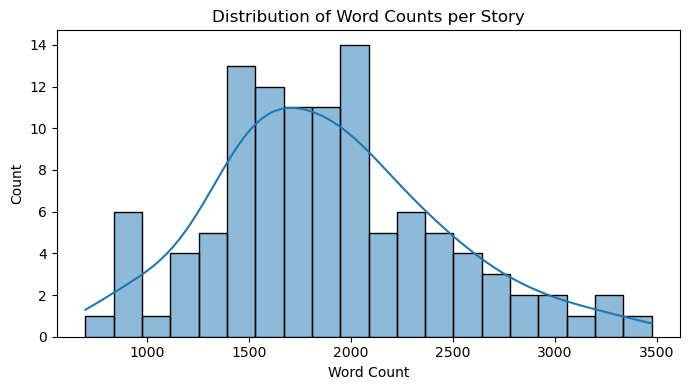

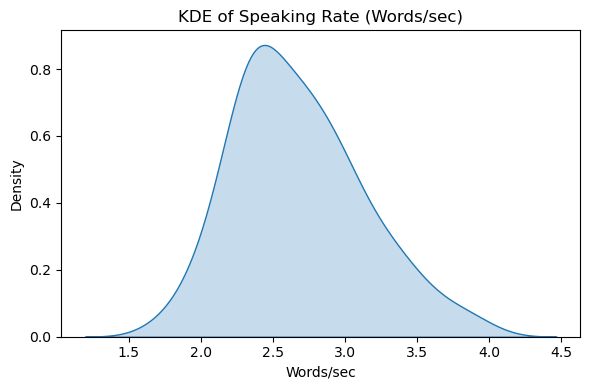

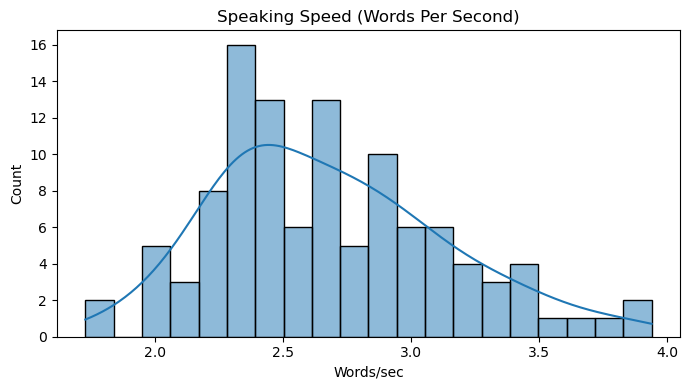

In [35]:
## Word Counts per Story

plt.figure(figsize=(7, 4))
sns.histplot(df_stats["n_words"], bins=20, kde=True)
plt.title("Distribution of Word Counts per Story")
plt.xlabel("Word Count")
plt.tight_layout()
plt.savefig("word_count.png", dpi=300) 
plt.show()


## Speaking Speed (Words Per Second)

plt.figure(figsize=(6, 4))
sns.kdeplot(df_stats["words_per_second"], fill=True)
plt.title("KDE of Speaking Rate (Words/sec)")
plt.xlabel("Words/sec")
plt.tight_layout()
plt.savefig("speak_rate.png", dpi=300) 
plt.show()

plt.figure(figsize=(7, 4))
sns.histplot(df_stats["words_per_second"], bins=20, kde=True)
plt.title("Speaking Speed (Words Per Second)")
plt.xlabel("Words/sec")
plt.tight_layout()
plt.savefig("speak_rate2.png", dpi=300) 
plt.show()


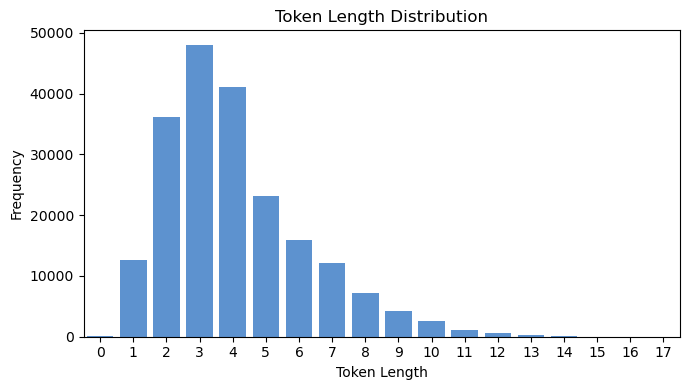

In [ ]:
## Word length
from collections import Counter

length_counts = Counter(word_lengths)
length_df = pd.DataFrame(sorted(length_counts.items()), columns=["length", "count"])

plt.figure(figsize=(7, 4))
sns.barplot(x="length", y="count", data=length_df, color="#4A90E2")
plt.title("Token Length Distribution")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("Token_length.png", dpi=300) 
plt.show()

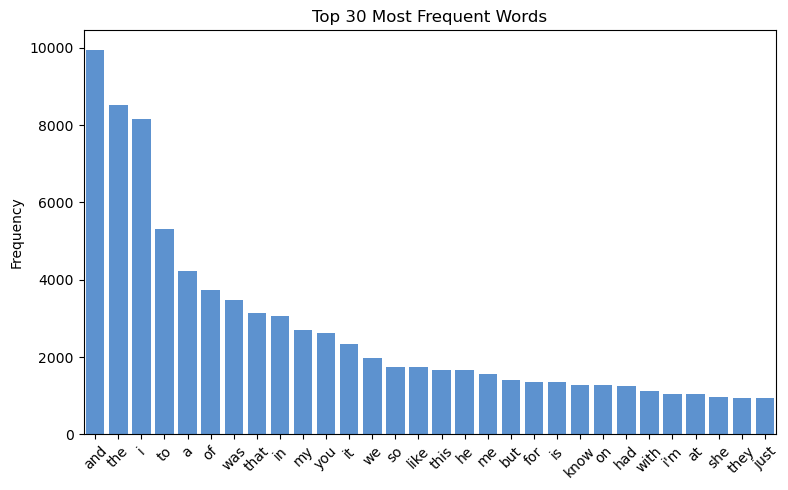

In [37]:
# ===== high frequncy =====
word_freq = Counter(all_words).most_common(30)
words, freqs = zip(*word_freq)

plt.figure(figsize=(8, 5))
sns.barplot(x=list(words), y=list(freqs), color="#4A90E2")
plt.xticks(rotation=45)
plt.title("Top 30 Most Frequent Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("frequency.png", dpi=300) 
plt.show()